Seaborn is a data visualization library based on matplotlib and closely integrated with pandas.
In this section we will cover a range of plots and data visualization options including:-
- Distribution plots
- Categorical plots
- Axis grids
- Matrix plots
- Regression plots

**1) Distribution plots - Visualizing the distribution of a dataset**
Useful plotting options for visualizing the distribution:-
- distplot()
- joinplot()
- pairplot()
- rugplot()
- kdeplot()

Another cool thing, seaborn comes with built-in datasets which helps us learn and practice our skills against benchmark data. These datasets can be conveniently loaded using its built-in function __load_dataset('dataset name')__ 

In [2]:
import seaborn as sns
%matplotlib inline

C:\Users\asuch\miniconda3\envs\dss-part1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The build-in dataset names can be retrieved using get_dataset_names()

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Lets start with the tips dataset containing data on the tips that restaurant staff recieve from customers.

In [4]:
tips = sns.load_dataset('tips')
type(tips)

pandas.core.frame.DataFrame

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**1.1) distplot()**
Most convenient way to take a look at a univariate (single variable) distribution in seaborn is the distplot() function. By default this will draw a histogram and fit a **kernel density estimate**. Don't worry we will look at kernel density soon.

C:\Users\asuch\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='total_bill', ylabel='Density'>

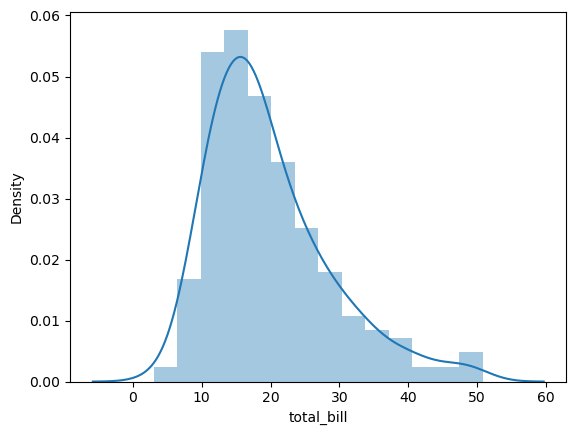

In [7]:
sns.distplot(tips['total_bill'])

Lets remove the KDE layer and display histogram only using `kde=false`

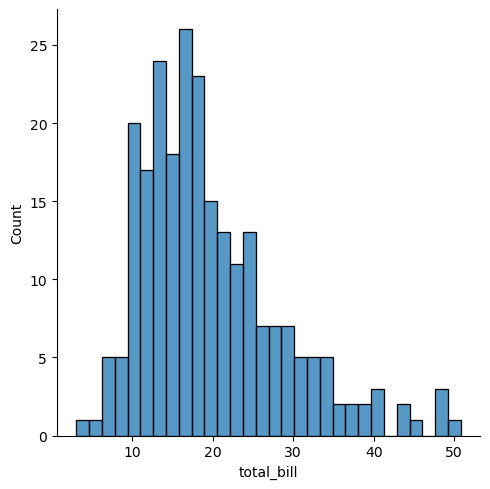

In [12]:
sns.displot(tips['total_bill'], kde=False, bins=30)

In [14]:
# sns.displot(tips['tip'], kde=False, bins=30)

Now we only have a histogram, x = total_bill, y = count. The data suggests that most bills are between 10 and 20$

**1.2) jointplot()**
We want to do some comparison, how much the customer gave in tip based on their total bill.
This is bivariate (two variables) data and can be plotted using jointplot().
The function basically matches up two distribution plots with our choice of what kind (scatter | reg | resid | kde | hex) of parameter to compare with.


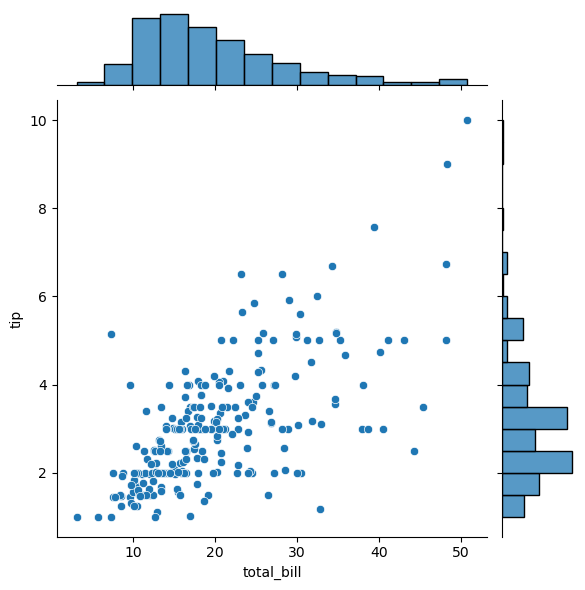

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips) #kind - scatter (default)

The above jointplot is essentiall two distribution plots along with a scatter plot having tip on y and total_bill on x-axis.

We can notice:-
- Most tips are less than $4. The maximum tip is $10
- There is a trend between tips and total bill
- Looks like the more customer paid in bill, the higher the tip.

Lets play with 'kind' parameter first

Kind = 'hex' - hexagon distribution representation. This is similar to scatter, however its very useful when you have several datapoints overlapping like above. The more the datapoints in a hex, the darker the color.

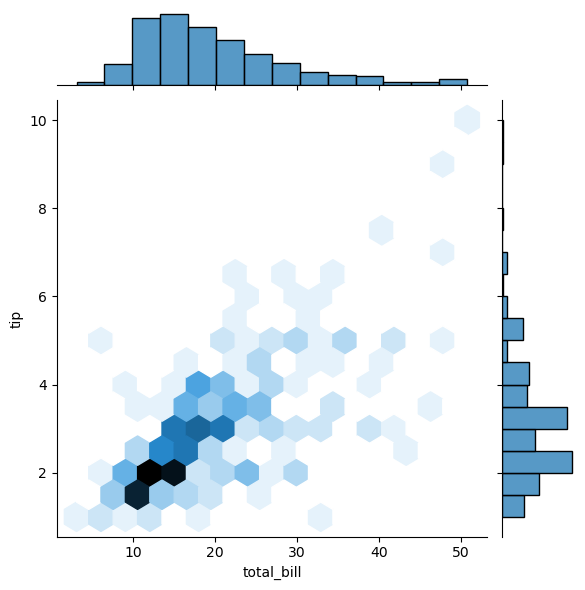

In [16]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

Kind = 'reg' is for regression. 
With this, the plot is like a scatter plot with a regression line drawn by seaborn. This is just showing almost like a linear fit to the scattered data points.

The plot has **pearson coefficient** and **p-value** which we will discuss later when learning **linear regression**.

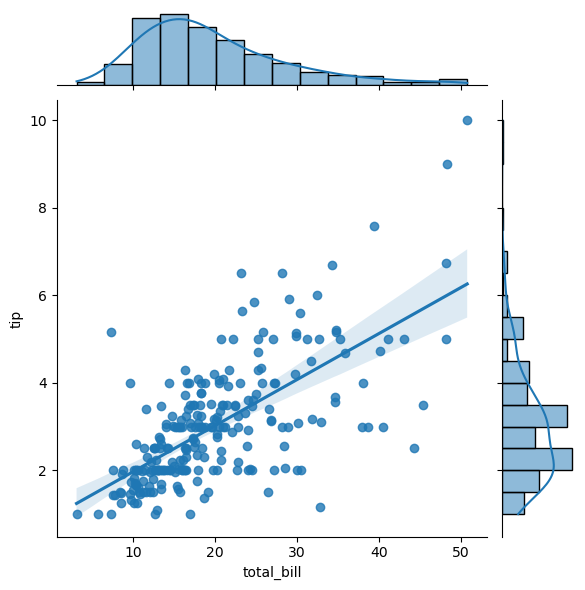

In [17]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

Kind = 'kde'.
This will give a 2D kde plot, showing the darker region with density where most of the data points match up.

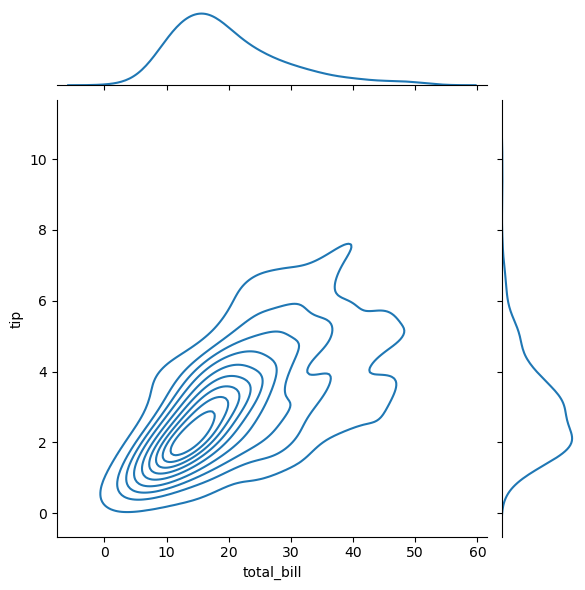

In [18]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

**1.3) pairplot()**
We want to have a quick look on our entire data to see the pairwise relationship.
This can be done using pairplot.
pairplot() puts multiple pairwise bivariate distributions in a dataset together on a single canvas.
This creates a matrix of axes and shows the relationship for each pair of columns in our dataset.

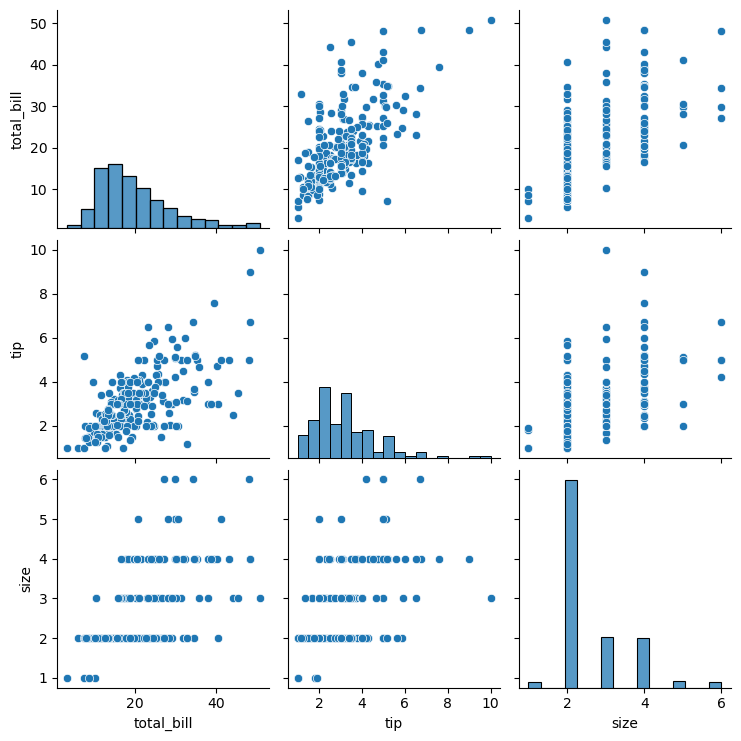

In [19]:
sns.pairplot(tips)

Note: pairplot may take a bit longer for larger dataframes

We see the function drew scatter plots for two variables, e.g. `total_bill vs size` and `tip vs size`. When it came to `size vs size`, it drew histogram instead (same with `tip vs tip` and `total_bill vs total_bill`.

pairplot() also supports a color `hue` argument for categorical columns. Lets try it on the `sex` column (male vs female)

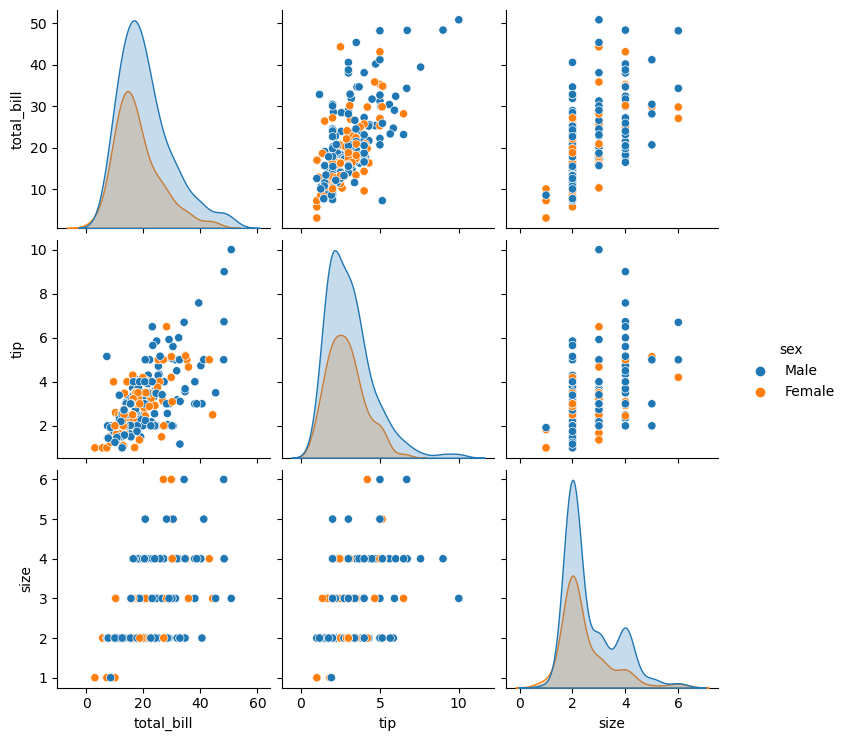

In [20]:
sns.pairplot(tips, hue='sex')

**1.4) rugplot()**
rugplot() is very simple, it just plot sticks on an axis for every data point on a univariate distribution. They are the building blocks of the kde plot that we have seen earlier.

<AxesSubplot: xlabel='total_bill'>

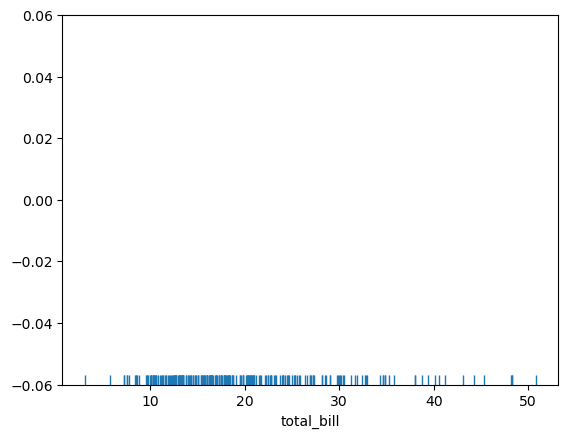

In [21]:
sns.rugplot(tips['total_bill'])

What is it doing? its drawing a line|stick for every single point in the passed data column

lets plot rugplot() vs distplot() on same canvas to get a better understanding

C:\Users\asuch\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='total_bill'>

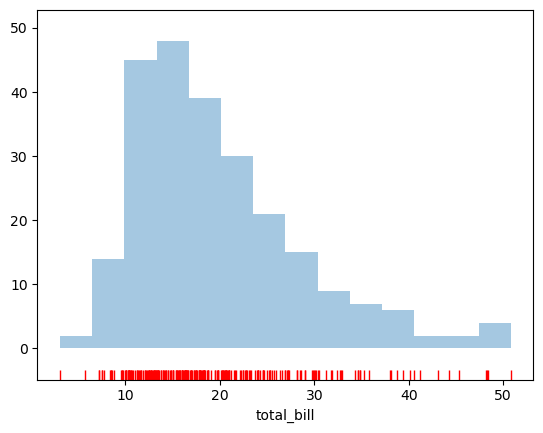

In [23]:
sns.rugplot(tips['total_bill'], color='r')
sns.distplot(tips['total_bill'], kde=False)

So the difference is
distplot - the histogram has bins and it counts how many sticks/lines are in that bin and then shows it as a number up along the y axis.
The number of all sticks/lines in rugplot are stacked on each other in distplot for the respective bin. 
More lines in the rugplot = higher bin in distplot

**1.5) kdeplot()**
KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. (we will create it from scratch in a while, stay tuned!)

C:\Users\asuch\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='total_bill', ylabel='Density'>

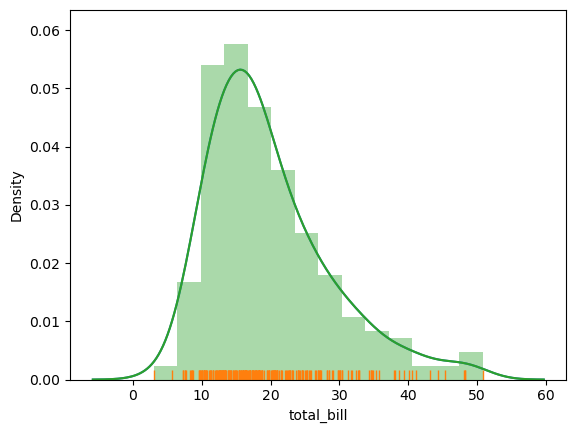

In [24]:
# lets put kdeplot, rugplot, distplot on a single canvas first
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
sns.distplot(tips['total_bill'])

C:\Users\asuch\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='tip', ylabel='Density'>

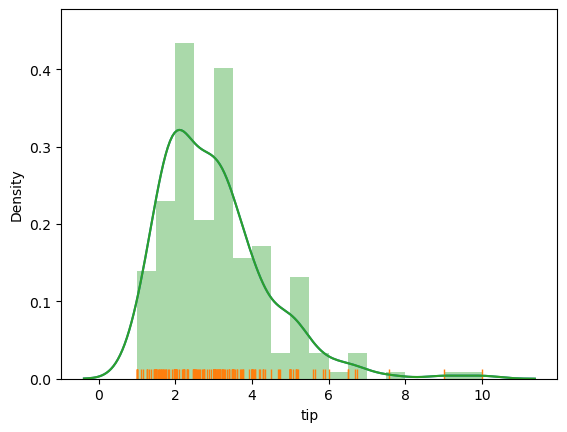

In [25]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])
sns.distplot(tips['tip'])

### It's time to understand KDE (Kernel Density Estimation plots) 
**[Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth) - `kdeplot`**

Let's try to understand `kde` plots using `rugplot`. How do we actually build kde line based on rugplot?
 The figure below ([source](https://upload.wikimedia.org/wikipedia/commons/4/41/Comparison_of_1D_histogram_and_KDE.png)) beautifully explains the process.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Comparison_of_1D_histogram_and_KDE.png" ></a>
Figure shows the comparison of the histogram (left) and kernel density estimate (right) constructed using the same data.<br>
On the right, we have: Each of the 6 black dash is the `rugplot` with 6 individual kernels ([normal Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution)) (the red dashed curves), on top of each black dash. The kernel density estimate is shown as blue curve -- ***The kernels in red dashes are summed to make the kernel density estimate (solid blue curve)***. The data points are the rug plot on the horizontal axis.<br>

KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.<br>

**Let's create a diagram to capture the concept of kde!**<br>
*Don't worry about understanding the code below, you will not use such codes in you data analysis. This is only to create a diagram (after running the code) for you to understand how the `kde plots` are calculated/computed and/or created. In the comments, I will go through the steps and explain what the code is doing!*

(0.0, 1.0)

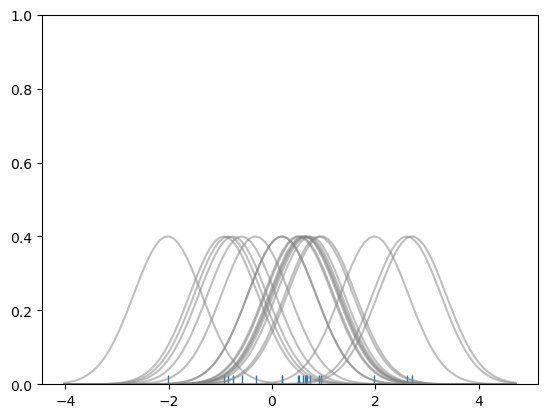

In [27]:
# Step 1: Importing couple of libraries to use 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Creating dataset to use
# setting seed to generate same random numbers everytime you run the code, if you use different 
# number in seed(), you may get different kde plot at the end. TRY CHANGING THE NUMBER IN SEED!
np.random.seed(101)

# data is the dataset from random.randn (recall numpy here!)
dataset = np.random.randn(20)

# Creating rugplot using dataset
sns.rugplot(dataset);

# Setting up the x-axis for the plot using max and min values in the dataset
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# creating 100 equally spaced points from x_min to x_max using np.linspace()
x_axis = np.linspace(x_min,x_max,100)

# Setting up the bandwidth, follow the wikipedia link for more information:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Creating an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) #shift+tab if you want to know more about the function! 
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

So, in the plot above, we have `rugplot` (line for each data point) and kernels for each line in the rugplot!

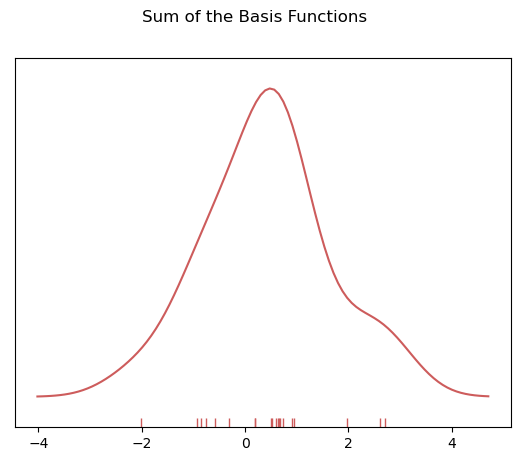

In [28]:
# We need to sum the basis functions to get the kde plot.

# Plotting the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)

# Plotting figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adding the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Getting rid of y-tick marks
plt.yticks([])

# Setting title
plt.suptitle("Sum of the Basis Functions");

In [ ]:
**So, this is how we create the kde plots!**